# Comprensión y exploración de los datos del negocio:

Para los datos del estado de Querétaro

## Carga de Datos

In [ ]:
#!pip install contextily==1.6.0

In [ ]:
# Importamos librerías 

import json
import requests
import os
import zipfile
import geopandas as gpd 
import pandas as pd
import io
#import contextily as cx
import numpy as np

In [ ]:
# Importamos los datos de Querétaro

df_qro=pd.read_csv('/work/Quéretaro/conjunto_de_datos_ageb_urbana_22_cpv2020.csv')
df_qro

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,22,Querétaro,0,Total de la entidad Querétaro,0,Total de la entidad,0000,0,2368467,1211647,...,289497,606978,430045,382086,183742,106431,22702,44358,208004,9228
1,22,Querétaro,1,Amealco de Bonfil,0,Total del municipio,0000,0,66841,34606,...,1740,12954,1926,3018,327,341,1708,3769,14205,1047
2,22,Querétaro,1,Amealco de Bonfil,1,Total de la localidad urbana,0000,0,7953,4224,...,885,1882,934,1032,208,157,68,142,979,16
3,22,Querétaro,1,Amealco de Bonfil,1,Total AGEB urbana,0042,0,84,43,...,5,18,8,6,4,3,3,0,9,0
4,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,1,13,*,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29813,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,62,7,*,...,*,*,*,*,*,*,*,*,*,*
29814,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,63,10,*,...,*,*,*,*,*,*,*,*,*,*
29815,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,64,27,13,...,*,8,*,*,*,0,*,0,4,0
29816,22,Querétaro,18,Tolimán,50,San Pablo Tolimán,011A,65,7,*,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
# Reducimos nuestra base de datos a una con únicamente nuestras variables de interés.

df_qro_limpio = df_qro[['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','AGEB', "MZA",'POBTOT','P_12A14_F','P_15A49_F','P_0A2','P_3A5','P12YM_CASA','PCATOLICA','PRO_CRIEVA','POTRAS_REL','PSIN_RELIG','POCUPADA','GRAPROES','VPH_SINCINT','PDER_SS']]
df_qro_limpio = df_qro_limpio.replace('*', pd.NA)
#df_qro_limpio=df_qro_limpio[df_qro_limpio.apply(lambda row:all(row != '*'), axis=1)]
df_qro_limpio.head()

(29818, 22)

In [ ]:
series_religiones = df_qro_limpio['PCATOLICA'].astype("Int64") + df_qro_limpio['PRO_CRIEVA'].astype("Int64") + df_qro_limpio['POTRAS_REL'].astype("Int64")
series_12_a_49 = df_qro_limpio['P_12A14_F'].astype("Int64") + df_qro_limpio['P_15A49_F'].astype("Int64")
series_0_a_5 = df_qro_limpio['P_0A2'].astype("Int64")+df_qro_limpio['P_3A5'].astype("Int64")
df_qro_limpio.insert(14,'PCON_RELIG',series_religiones)
df_qro_limpio.insert(9,'P_12A49_F',series_12_a_49)
df_qro_limpio.insert(24,'P_0A5',series_0_a_5)
df_qro_limpio=df_qro_limpio.drop(['PCATOLICA','PRO_CRIEVA','POTRAS_REL','P_12A14_F','P_15A49_F','P_3A5',"P_0A2"],axis=1)
#df_qro_limpio.rename(columns={'PDER_SS':'Personas_C/Servicio de Salud','VPH_SINCINT': 'Personas_S/Internet','GRAPROES': 'Prom_Grado_Escolar','POCUPADA': 'Personas_Ocupadas','POBTOT': 'Poblacion_Total','P12YM_CASA': 'Personas_Casadas','P_0A2': 'Poblacion_de_0_a_5','PSIN_RELIG':'Personas_s/religion','PROM_HNV':'Promedio_de_nacidos','GRAP':'Personas_Separadas'},inplace =True)
df_qro_limpio.query("~NOM_LOC.str.startswith('Total')",inplace=True)
df_qro_limpio.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS,P_0A5
4,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,1,13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,2,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,3,10,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,4,15,<NA>,6,15,0,5,10.22,<NA>,9,<NA>
8,22,Querétaro,1,Amealco de Bonfil,1,Amealco de Bonfil,0042,5,19,<NA>,5,13,6,11,13.14,<NA>,10,0


## Descripción Estadística

In [ ]:
# Dimensión del dataset
df = df_qro_limpio
df.shape

(28793, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28793 entries, 4 to 29817
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ENTIDAD      28793 non-null  int64 
 1   NOM_ENT      28793 non-null  object
 2   MUN          28793 non-null  int64 
 3   NOM_MUN      28793 non-null  object
 4   LOC          28793 non-null  int64 
 5   NOM_LOC      28793 non-null  object
 6   AGEB         28793 non-null  object
 7   MZA          28793 non-null  int64 
 8   POBTOT       28793 non-null  int64 
 9   P_12A49_F    16003 non-null  Int64 
 10  P12YM_CASA   26482 non-null  object
 11  PCON_RELIG   21744 non-null  Int64 
 12  PSIN_RELIG   22964 non-null  object
 13  POCUPADA     26657 non-null  object
 14  GRAPROES     26740 non-null  object
 15  VPH_SINCINT  20174 non-null  object
 16  PDER_SS      26664 non-null  object
 17  P_0A5        13809 non-null  Int64 
dtypes: Int64(3), int64(5), object(10)
memory usage: 4.3+ MB


In [ ]:
df['P_12A49_F']=df['P_12A49_F'].astype("Int64")
df["P12YM_CASA"] = df["P12YM_CASA"].astype("Int64")
df["PSIN_RELIG"] = df["PSIN_RELIG"].astype("Int64")
df["PDER_SS"] = df["PDER_SS"].astype("Int64")
df["POCUPADA"] = df["POCUPADA"].astype("Int64")
df["GRAPROES"] = df["GRAPROES"].astype("Float64")
df["VPH_SINCINT"] = df["VPH_SINCINT"].astype("Int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28793 entries, 4 to 29817
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ENTIDAD      28793 non-null  int64  
 1   NOM_ENT      28793 non-null  object 
 2   MUN          28793 non-null  int64  
 3   NOM_MUN      28793 non-null  object 
 4   LOC          28793 non-null  int64  
 5   NOM_LOC      28793 non-null  object 
 6   AGEB         28793 non-null  object 
 7   MZA          28793 non-null  int64  
 8   POBTOT       28793 non-null  int64  
 9   P_12A49_F    16003 non-null  Int64  
 10  P12YM_CASA   26482 non-null  Int64  
 11  PCON_RELIG   21744 non-null  Int64  
 12  PSIN_RELIG   22964 non-null  Int64  
 13  POCUPADA     26657 non-null  Int64  
 14  GRAPROES     26740 non-null  Float64
 15  VPH_SINCINT  20174 non-null  Int64  
 16  PDER_SS      26664 non-null  Int64  
 17  P_0A5        13809 non-null  Int64  
dtypes: Float64(1), Int64(8), int64(5), object(4)
memory

In [ ]:
df.describe()

,ENTIDAD,MUN,LOC,MZA,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS,P_0A5
count,28793.0,28793.000000,28793.000000,28793.000000,28793.000000,16003.0,26482.0,21744.0,22964.0,26657.0,26740.0,20174.0,26664.0,13809.0
mean,22.0,12.599868,50.186399,29.412427,65.316744,23.581016,30.147006,61.446376,7.562271,37.013655,10.090466,5.466194,55.376238,8.927946
std,0.0,3.615686,114.505829,74.425197,81.177371,31.895643,35.166098,73.062805,11.824376,44.069134,4.085817,7.717469,66.06141,10.18504
min,22.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,22.0,11.000000,1.000000,9.000000,18.000000,5.0,10.0,18.0,0.0,12.0,8.54,0.0,18.0,0.0
50%,22.0,14.000000,1.000000,20.000000,45.000000,14.0,22.0,43.0,5.0,26.0,10.38,4.0,39.0,8.0
75%,22.0,14.000000,45.000000,32.000000,87.000000,32.0,39.0,81.0,10.0,48.0,13.18,7.0,72.0,13.0
max,22.0,18.000000,507.000000,800.000000,2155.000000,728.0,927.0,1854.0,342.0,1231.0,19.27,142.0,1782.0,171.0


In [ ]:
#df.loc[df['PCON_RELIG'].idxmax()]

In [ ]:
#Otras medidas de tendencia central no incluidas en el método .describe()
print("\n\nMediana de las variables")
print(df.median(numeric_only = True))
print("\n\n Moda de las variables")
print(df.mode())



Mediana de las variables
ENTIDAD         22.0
MUN             14.0
LOC              1.0
MZA             20.0
POBTOT          45.0
P_12A49_F       14.0
P12YM_CASA      22.0
PCON_RELIG      43.0
PSIN_RELIG       5.0
POCUPADA        26.0
GRAPROES       10.38
VPH_SINCINT      4.0
PDER_SS         39.0
P_0A5            8.0
dtype: Float64


 Moda de las variables
   ENTIDAD    NOM_ENT  MUN    NOM_MUN  LOC                NOM_LOC  AGEB  MZA  \
0       22  Querétaro   14  Querétaro    1  Santiago de Querétaro  1113    1   

   POBTOT  P_12A49_F  P12YM_CASA  PCON_RELIG  PSIN_RELIG  POCUPADA  GRAPROES  \
0       0          0           0           0           0         0       0.0   

   VPH_SINCINT  PDER_SS  P_0A5  
0            0        0      0  


In [ ]:
print("TABLAS DE FRECUENCIAS PARA VARIABLES CUALITATIVAS\n")
print("Tabla de frecuencias para:")
print(pd.DataFrame(df["NOM_ENT"]).value_counts(),"\n")
print("Tabla de frecuencias para:")
print(pd.DataFrame(df["NOM_MUN"]).value_counts(),"\n")
print("Tabla de frecuencias para:")
print(pd.DataFrame(df["NOM_LOC"]).value_counts(),"\n")
print("Tabla de frecuencias para:")
print(pd.DataFrame(df["AGEB"]).value_counts())

TABLAS DE FRECUENCIAS PARA VARIABLES CUALITATIVAS

Tabla de frecuencias para:
NOM_ENT  
Querétaro    28793
Name: count, dtype: int64 

Tabla de frecuencias para:
NOM_MUN            
Querétaro              13579
San Juan del Río        4338
El Marqués              2916
Corregidora             2864
Tequisquiapan           1256
Pedro Escobedo           893
Ezequiel Montes          591
Cadereyta de Montes      452
Colón                    426
Jalpan de Serra          360
Tolimán                  331
Amealco de Bonfil        190
Arroyo Seco              172
Huimilpan                165
Landa de Matamoros        85
Peñamiller                63
San Joaquín               58
Pinal de Amoles           54
Name: count, dtype: int64 

Tabla de frecuencias para:
NOM_LOC                         
Santiago de Querétaro               10196
San Juan del Río                     2989
El Pueblito                          1683
Tequisquiapan                         757
Juriquilla                            66

## Explorando Datos con Herramientas de Visualización

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_cuantitativo = df.select_dtypes(include=numerics)
df_cualitativo = df.select_dtypes(include = object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Variables Cuantitativas

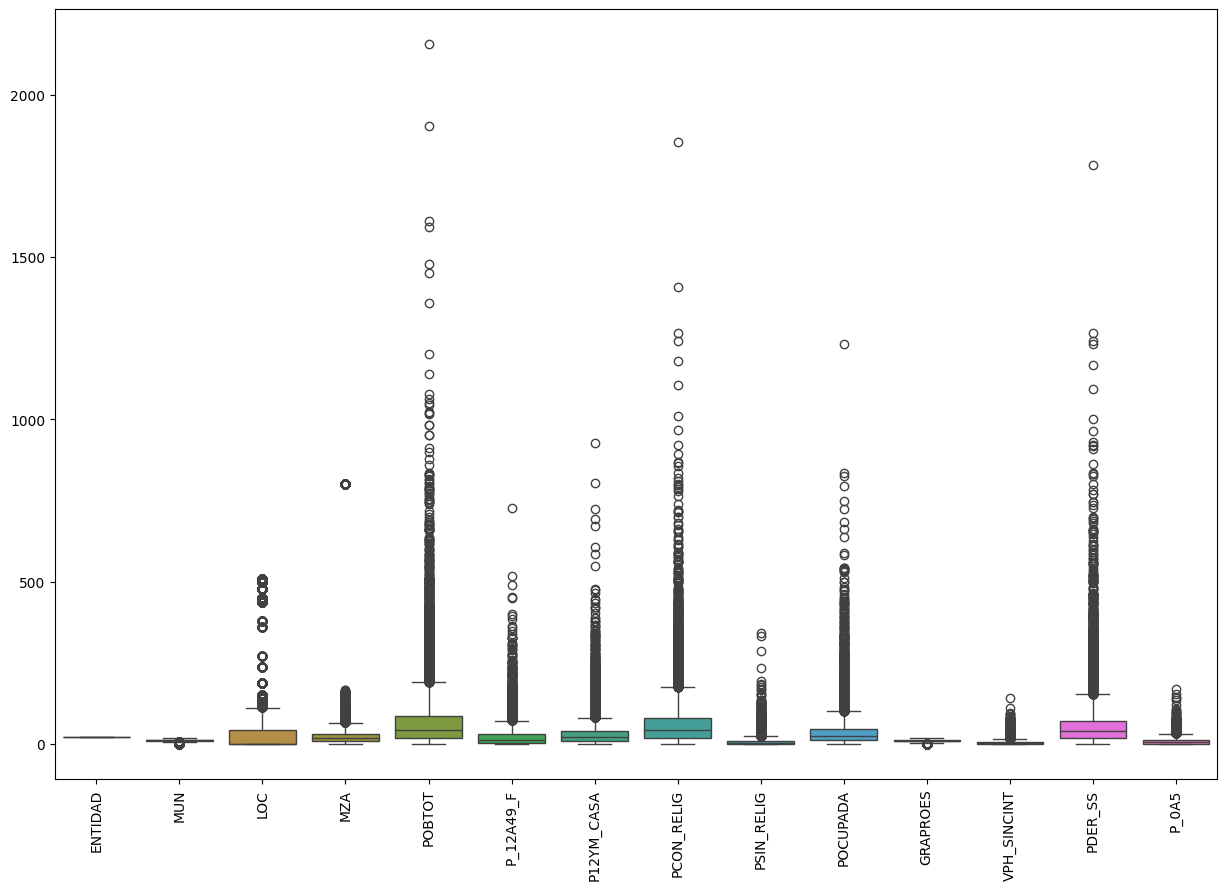

In [ ]:
# Box plots con medidas de dispersión no central
plt.figure(figsize=(15,10))
sns.boxplot(data=df_cuantitativo)
plt.tick_params(axis = "x", labelrotation = 90)
plt.show()

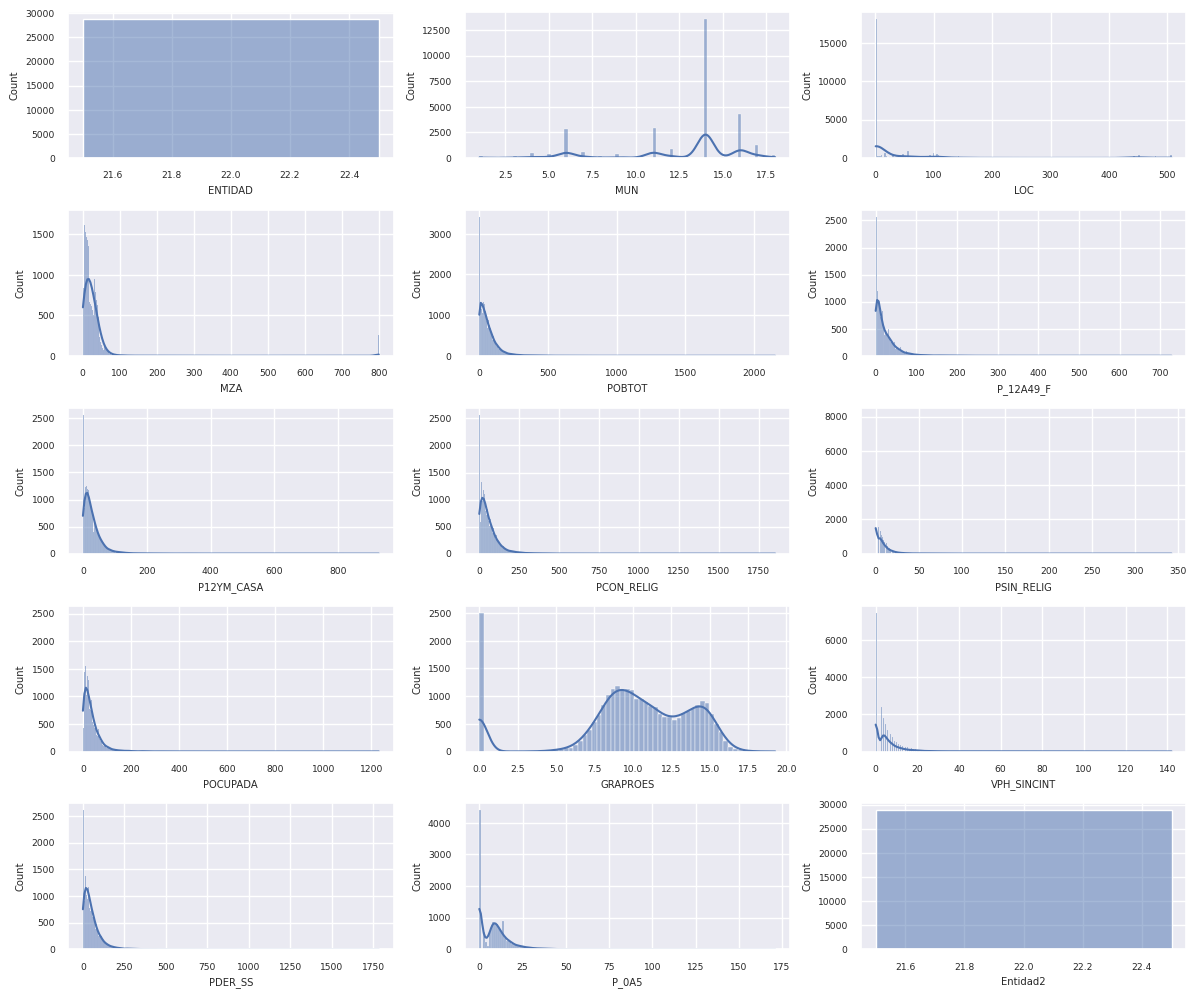

In [ ]:
sns.set(font_scale = 0.6)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,10))
df_cuantitativo["Entidad2"]  = df_cuantitativo["ENTIDAD"]
for i, ax in enumerate(axes.flatten()):
    sns.histplot(x= df_cuantitativo.iloc[:, i], ax=ax, kde = True)
fig.tight_layout()
plt.show()

In [ ]:
df_cuantitativo.corr(method='pearson')

,ENTIDAD,MUN,LOC,MZA,POBTOT,P_12A49_F,P12YM_CASA,PCON_RELIG,PSIN_RELIG,POCUPADA,GRAPROES,VPH_SINCINT,PDER_SS,P_0A5,Entidad2
ENTIDAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUN,NaN,1.000000,-0.085538,-0.013480,0.015544,0.001904,0.009324,0.013269,0.036314,0.017571,-0.017543,0.016295,0.020458,0.003810,NaN
LOC,NaN,-0.085538,1.000000,-0.021225,-0.050683,-0.050843,-0.037585,-0.066867,0.015729,-0.046670,0.077461,-0.056286,-0.053683,-0.023592,NaN
MZA,NaN,-0.013480,-0.021225,1.000000,-0.077325,-0.069531,-0.067099,-0.071575,-0.060695,-0.072519,-0.078555,-0.014178,-0.068245,-0.068569,NaN
POBTOT,NaN,0.015544,-0.050683,-0.077325,1.000000,0.989184,0.986667,0.994479,0.786132,0.985600,0.199366,0.605077,0.988430,0.900878,NaN
P_12A49_F,NaN,0.001904,-0.050843,-0.069531,0.989184,1.000000,0.979260,0.984123,0.822071,0.981792,0.248440,0.618421,0.982986,0.913453,NaN
P12YM_CASA,NaN,0.009324,-0.037585,-0.067099,0.986667,0.979260,1.000000,0.981237,0.788567,0.973553,0.216558,0.588507,0.979609,0.898648,NaN
PCON_RELIG,NaN,0.013269,-0.066867,-0.071575,0.994479,0.984123,0.981237,1.000000,0.724440,0.977174,0.219182,0.640747,0.982362,0.906105,NaN
PSIN_RELIG,NaN,0.036314,0.015729,-0.060695,0.786132,0.822071,0.788567,0.724440,1.000000,0.807721,0.303240,0.294826,0.791581,0.696355,NaN
POCUPADA,NaN,0.017571,-0.046670,-0.072519,0.985600,0.981792,0.973553,0.977174,0.807721,1.000000,0.223176,0.558637,0.978935,0.871424,NaN


In [ ]:
correlation_matrix = df_cuantitativo.corr().round(2)

In [ ]:
#sns.heatmap(data=correlation_matrix, annot=True)
#plt.show()

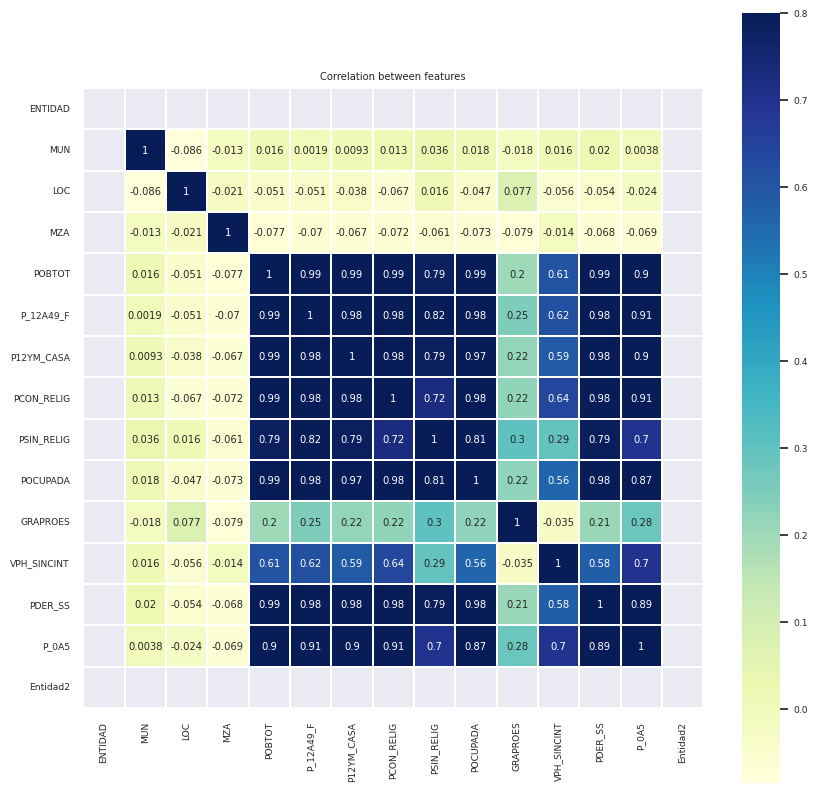

In [ ]:
corr=df_cuantitativo.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');
plt.show()

### Variables Cualitativas 

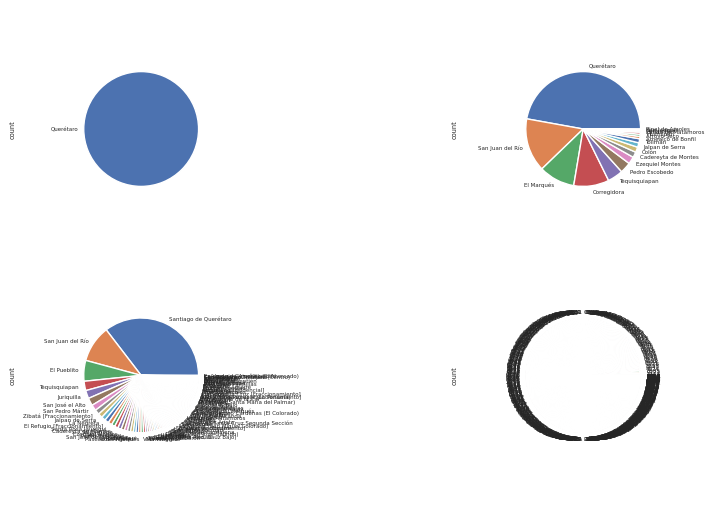

In [ ]:
# Diagramas de Pie de las variables cualitativas.
sns.set(font_scale = 0.4)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
df_cualitativo.iloc[:, 0].value_counts().plot.pie(ax = axes[0,0],textprops={'size': 'smaller'}, radius=0.6)
df_cualitativo.iloc[:, 1].value_counts().plot.pie(ax = axes[0,1],textprops={'size': 'smaller'}, radius=0.6)
df_cualitativo.iloc[:, 2].value_counts().plot.pie(ax = axes[1,0],textprops={'size': 'smaller'}, radius=0.6)
df_cualitativo.iloc[:, 3].value_counts().plot.pie(ax = axes[1,1],textprops={'size': 'smaller'}, radius=0.6)
fig.tight_layout()
plt.show()

In [ ]:
print("Tabla de contingencia para el Nombre de Estado con Población de 0 a 5:")
pd.crosstab(df_cualitativo.iloc[:, 0], df["P_0A5"], normalize=True)

Tabla de contingencia para el Nombre de Estado con Población de 0 a 5:


P_0A5,0,3,4,5,6,7,8,9,10,11,...,99,102,105,107,121,135,141,146,155,171
NOM_ENT,,,,,,,,,,,,,,,,,,,,,
Querétaro,0.317836,0.040408,0.017525,0.007024,0.03867,0.055761,0.062133,0.057716,0.056919,0.047795,...,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072


In [ ]:
print("Tabla de contingencia para el Nombre de Municipio con Población de 0 a 5:")
pd.crosstab(df_cualitativo.iloc[:, 1], df["P_0A5"], normalize=True)

Tabla de contingencia para el Nombre de Municipio con Población de 0 a 5:


P_0A5,0,3,4,5,6,7,8,9,10,11,...,99,102,105,107,121,135,141,146,155,171
NOM_MUN,,,,,,,,,,,,,,,,,,,,,
Amealco de Bonfil,0.001883,0.000145,0.000145,0.000000,0.000217,0.000507,0.000362,0.000290,0.000290,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arroyo Seco,0.002462,0.000362,0.000000,0.000000,0.000072,0.000434,0.000217,0.000290,0.000217,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cadereyta de Montes,0.004635,0.000724,0.000217,0.000000,0.000724,0.000507,0.001014,0.000507,0.000217,0.000724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colón,0.003476,0.000290,0.000145,0.000072,0.000507,0.000652,0.000941,0.001159,0.001086,0.000290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Corregidora,0.032225,0.004779,0.002100,0.001014,0.003476,0.005069,0.006445,0.004779,0.005431,0.003548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
El Marqués,0.029618,0.004345,0.001521,0.000362,0.004779,0.005576,0.006735,0.006880,0.005793,0.005214,...,0.000000,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000000
Ezequiel Montes,0.007821,0.000579,0.000072,0.000362,0.000507,0.001303,0.000941,0.001014,0.000869,0.000652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Huimilpan,0.001521,0.000217,0.000290,0.000000,0.000145,0.000290,0.000217,0.000362,0.000217,0.000145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jalpan de Serra,0.003548,0.000652,0.000217,0.000072,0.000434,0.000579,0.000724,0.000869,0.000579,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print("Tabla de contingencia para el Nombre de Localidad con Población de 0 a 5:")
pd.crosstab(df_cualitativo.iloc[:, 2], df["P_0A5"], normalize=True)

Tabla de contingencia para el Nombre de Localidad con Población de 0 a 5:


P_0A5,0,3,4,5,6,7,8,9,10,11,...,99,102,105,107,121,135,141,146,155,171
NOM_LOC,,,,,,,,,,,,,,,,,,,,,
Ajuchitlancito,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000072,0.000145,0.000000,0.000145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ajuchitlán,0.000869,0.000000,0.000000,0.000000,0.000000,0.000072,0.000145,0.000290,0.000072,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alfajayucan,0.000579,0.000145,0.000000,0.000000,0.000145,0.000072,0.000000,0.000145,0.000072,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amazcala,0.000652,0.000217,0.000145,0.000072,0.000072,0.000000,0.000290,0.000000,0.000145,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amealco de Bonfil,0.001738,0.000072,0.000145,0.000000,0.000217,0.000507,0.000362,0.000290,0.000217,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villas la Piedad,0.000290,0.000000,0.000000,0.000000,0.000072,0.000072,0.000000,0.000145,0.000217,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Visthá,0.000217,0.000072,0.000000,0.000000,0.000072,0.000000,0.000145,0.000072,0.000072,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vizarrón de Montes,0.001376,0.000290,0.000072,0.000000,0.000145,0.000072,0.000072,0.000072,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Tabla de contingencia para el AGEB con Población de 0 a 5:")
pd.crosstab(df_cualitativo.iloc[:, 3], df["P_0A5"], normalize=True)

Tabla de contingencia para el AGEB con Población de 0 a 5:


P_0A5,0,3,4,5,6,7,8,9,10,11,...,99,102,105,107,121,135,141,146,155,171
AGEB,,,,,,,,,,,,,,,,,,,,,
002A,0.000724,0.000072,0.000000,0.000072,0.000000,0.000000,0.000217,0.000072,0.000072,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0034,0.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0042,0.000145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0050,0.000362,0.000000,0.000000,0.000072,0.000000,0.000000,0.000072,0.000000,0.000072,0.000145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0052,0.000507,0.000145,0.000072,0.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.000217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,0.001231,0.000000,0.000217,0.000000,0.000000,0.000072,0.000000,0.000217,0.000145,0.000217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5126,0.000434,0.000217,0.000000,0.000000,0.000072,0.000072,0.000000,0.000072,0.000000,0.000145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5130,0.000290,0.000000,0.000000,0.000000,0.000072,0.000217,0.000072,0.000072,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0848c89-aa3f-4842-a14c-1735a6491904' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>